## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

*The number of rows is 294478.*

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

*There are 290584 unique users in the dataset.*

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted, meaning the number of users who decide to pay for the company's product.

*12% of users are converted.*

In [5]:
df['converted'].value_counts(normalize=True)

0    0.880341
1    0.119659
Name: converted, dtype: float64

e. The number of times the `new_page` and `treatment` don't line up.

*`new_page` and `treatment` do not allign in 3893 cases.*

In [6]:
df.query('(group == "treatment" & landing_page != "new_page") | (group != "treatment" & landing_page == "new_page")').shape[0]

3893

f. Do any of the rows have missing values?

*No values are missing.*

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.   

*This rows will be dropped from the data set.*

a. Store your new dataframe in **df2**.

In [8]:
df2 = df.drop(df.query('(group == "treatment" & landing_page != "new_page") | (group != "treatment" & landing_page == "new_page")').index)
df2.shape

(290585, 5)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions below.

a. How many unique **user_id**s are in **df2**?

*There are 290584 users with a unique user ID.*

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

*The user with ID 773192 is repeated in the data set.*

In [11]:
df2[df2.user_id.duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

*This user comes from treatment group, its landing page is thus the new page; the value of converted column for the non-unique id is 0*

In [12]:
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(["user_id"],keep='first',inplace=True)
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer questions below.

a. What is the probability of an individual converting regardless of the page they receive?

*The probability of converting regardless of the page is 0.1196.*

In [14]:
df2.query('converted == 1').shape[0] / df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

*The probability of converting for users in control group is 0.1204.*

In [15]:
obs_control = df2.query('converted == 1 & group == "control"').shape[0] / df2.query('group == "control"').shape[0]
obs_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

*The probability of converting for users in treatment group is 0.1188.*

In [16]:
obs_experiment = df2.query('converted == 1 & group == "treatment"').shape[0] / df2.query('group == "treatment"').shape[0]
obs_experiment

0.11880806551510564

We will also caculate an observed difference between convertions rates of two groups:

In [17]:
obs_diff = obs_experiment - obs_control
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

*The probability to receive a new page is 0.500.*

In [18]:
df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

*The probability of conversion for control group is higher (12.04%) than the probability of conversion for treatment group (11.88%). Since the probability for conversion is lower with the new page, even if the difference is really small (0.16%) I do not believe that there is sufficient evidence to consider that new page leads for more conversions.*

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} \leq 0$$

$$H_{alt}: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation. 

a. What is the **convert rate** for $p_{new}$ under the null? 

*The convert rate for $p_{new}$ is 0.1196.*

In [19]:
p_new = df2['converted'].sum() / len(df2)
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? 

*The convert rate for $p_{old}$ is 0.1196.*

In [20]:
p_old = df2['converted'].sum() / len(df2)
p_old

0.11959708724499628

c. What is $n_{new}$?

*The number of individuals in the treatment group is 145310.*

In [21]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

*The number of individuals in the control group is 145274.*

In [22]:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice(2,n_new,p=[p_new,1-p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice(2,n_old,p=[p_old,1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

*The difference is almost 0.*

In [25]:
p_diff_simulate = new_page_converted.mean() - old_page_converted.mean()
p_diff_simulate

0.002665557582471112

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
p_diffs = []

for _ in range(10000):
    p_new1 = np.random.choice(2,n_new,replace=True,p=[p_new,1-p_new])
    p_old1 = np.random.choice(2,n_old,replace=True,p=[p_old,1-p_old])
    p_new2 = p_new1.mean()
    p_old2 = p_old1.mean()
    p_diffs.append(p_new2-p_old2)
    
p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

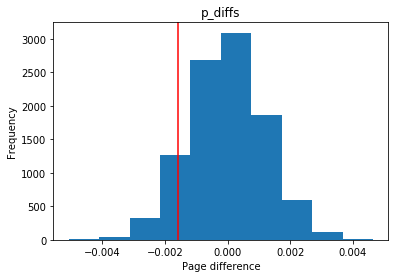

In [27]:
plt.hist(p_diffs)
plt.axvline(x= obs_diff,color='r')
plt.xlabel('Page difference') 
plt.ylabel('Frequency')
plt.title('p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

*90.39% of `p_diffs` are greater than `obs_diff`.*

In [41]:
(p_diffs > obs_diff).mean()

0.9039

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

*In **j** we have calculated the p-value, i.e. the probability of obtaining the conversion difference at least as extreme as observed (`obs_diff`) under the assumption that the null hypothesis ($p_{new} - p_{old} \leq 0$) is correct.*

*Such a large p-value ($p > 0.05$, larger that 5% of type I error rate) means that the observed difference would be very likely under the null hypothesis. Therefore, we fail to reject the null and consider that the old page converts more users than the new page.*

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = df2.query('converted==1 and landing_page=="old_page"').shape[0]
convert_new = df2.query('converted==1 and landing_page=="new_page"').shape[0]
n_old = df2.query('landing_page=="old_page"').shape[0]
n_new = df2.query('landing_page=="new_page"').shape[0]

/home/natasha/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

*The order is important and has to follow our hypotheses, so we systematically start with **new** for `count` and `nob`; alternative **larger** means that the alternative hypothesis is `prop > value`.*

In [30]:
#Computing z_score and p_value
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old], [n_new,n_old],alternative='larger') 

#display z_score and p_value
print(z_score,p_value)

-1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

*The [z-score](https://www.simplypsychology.org/z-score.html) tells us how many standard deviations we are away from the mean. Here, we are 1.31 standard deviations below the mean. The probability of randomly selecting a score between -1.96 and +1.96 standard deviations from the mean is 95%. Our z-value falls into this range.*

*The p-value is close to the one computed before, so it supports our previous findings: the p-value is very large, so we fail to reject the null, hence old page converts more users.*

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

*Logistic regression is used when the output is binary.*

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
import statsmodels.api as sm

logit = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 27 Dec 2021   Pseudo R-squ.:               8.077e-06
Time:                        07:45:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

*The null and alternative hypotheses used in part II were the following:*

$$H_0: p_{new} - p_{old} \leq 0$$

$$H_{alt}: p_{new} - p_{old} > 0$$

*The null was that the old page has equal or higher conversions compared to the new page. The alternative hypothesis was that the new page results in better conversions than the old one (one-tailed test).*

*Regression model use by default the following hypotheses:*

$$H_0: p_{new} - p_{old} = 0$$

$$H_{alt}: p_{new} - p_{old} \neq 0$$

*In logistic regression performed with statsmodels the null hypothesis is that there is no difference in conversion rate for old and new pages. The alternative is that there is a difference in conversion, which, in this case, can be either positive or negative (two-tailed test). With the p-value higher than 0.05 (type I error threshhold) we do not have statistical evidence to support the claim that the new page differs from the old one in terms of conversions. We therefore fail to reject the null.*

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

*When performing A/B tests we should be carefull with factors we take into consideration. Poor test design may lead to a poor decision. We also should deal with a possible change aversion or novelty effect that the current users might experience.* 

*In this case we based our analysis only on one factor: the new page. However, several other factors may be included into our A/B tests, such as, as shown above, the country a user lives in.*

*The disadvantage of adding extra terms into a regression model is that we are more likely to observe significant differences just by chance.*

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


*There are three values in the `country` column:*

In [35]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [36]:
### Create the necessary dummy variables
dummy_countries = pd.get_dummies(df_new['country'])
df_new = df_new.join(dummy_countries, how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


*We'll use US as a baseline for our regression model:*

In [37]:
logit = sm.Logit(df_new['converted'], df_new[['intercept','CA','UK']])
model = logit.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 27 Dec 2021   Pseudo R-squ.:               1.521e-05
Time:                        07:45:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

*Based on this output we do not have a statistical evidence that the country has impact on conversion. The p-values suggest that there is no statistically significant evidence that the average conversion of users from CA or UK differs from the average conversion of users from US.* 

*If we compare confidence intervals for CA and UK, we see that they overlap, we do not have evidence that CA differ from UK either.*

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
### Fit Your Linear Model And Obtain the Results
logit = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA','UK']])
model = logit.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 27 Dec 2021   Pseudo R-squ.:               2.323e-05
Time:                        07:45:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

*If we include both page and country in our model, there is still no statistically significant evidence that the new page or the country contribute to conversion.*

*As suggested, we can check if an interaction between page and country may have an effect on conversion rate. We will create additional columns:*

In [39]:
df_new['UK_ab_page'] = df_new['ab_page'] * df_new['UK']
df_new['CA_ab_page'] = df_new['ab_page'] * df_new['CA']
df_new['US_ab_page'] = df_new['ab_page'] * df_new['US']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,UK_ab_page,CA_ab_page,US_ab_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0,0


*To avoid multicolinearity, we will use only the new variables in the model and exclude `ab_page` and `country`.*

*As for previous model, we will use `US_ab_page` as baseline:*

In [40]:
logit = sm.Logit(df_new['converted'], df_new[['intercept','CA_ab_page','UK_ab_page']])
model = logit.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 27 Dec 2021   Pseudo R-squ.:               2.364e-05
Time:                        07:45:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.08085
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9963      0.006   -322.049      0.000      -2.008      -1.984
CA_ab_page    -0.0752      0.038     -1.997      0.046      -0.149      -0.001
UK_ab_page     0.0149      0.017      0.862      0.389      -0.019       0.049
==============================================================================
"""

*The results differ in findings: based on p-values, we have a statistically significant evidence that users in CA who land on the new page convert more than users from US landing on the new page (p-value < 0.05). However, there is no statistically significant evidence, that users from CA and UK differ in conversions.*

*Even if the difference in conversion rate is statistically significant for users from CA, there is no practical significance of this finding, since the e-commerce compagny could not launch the new version of the page only in Canada. Therefore, we would still go with the old page and do not use the new version.*

*However, the interaction effects occur when the effect of one variable depends on the value of another variable, so when we include the interaction 'UK_ab_page' for example, we should include its base country 'UK' as well to get the correct p-values because the relationship here is "rely on". We can not discard neither country nor its interaction.*

*We will include lower oder terms into the model besides higher order terms. This will allow to obtain accurate p-values.*

In [42]:
logit = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK', 'CA_ab_page','UK_ab_page']])
model = logit.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Mon, 27 Dec 2021   Pseudo R-squ.:               2.417e-05
Time:                        09:21:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2729
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0073      0.037     -0.196      0.844      -0.080       0.065
UK             0.0045      0.018      0.257      0.797      -0.030       0.039
CA_ab_page    -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_ab_page     0.0108      0.023      0.475      0.635      -0.034       0.056
==============================================================================
"""

*The analysis performed with both lower and high order terms show that we do not have any statistically significate evidence that the new page results in different conversions, compared to the old page. We fail to reject the null.*

*The final conclusion is that the e-commerce compagny should preserve the old page and should not use the new one.*